In [1]:
%matplotlib inline
%run ./parse.py
bp = BellaParse()
%run ./search.py
bs = BellaSearch()
%run ./topics.py
bt = BellaTopics()
%run ./utils.py
bu = BellaUtils()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Topic modeling

In [24]:
fp='./bella/bellascraper/bellascraper/data/review_serum.tsv'
review_long_df = bp.parse_reviewTable(fp, products='all', short_sentence=False)
review_long_df = review_long_df.drop_duplicates(subset='review')
reviews_long =  review_long_df['review'].map(bp.clean)

In [4]:
review_long_df.head()

,r_product,r_reviewer,r_time,r_star,review
0,P414671,sophiaeris,2018-04-12 13:17:26+00:00,5,better than the large size!. I had the large o...
1,P414671,Danii1213,2018-03-17 23:30:09+00:00,5,Yassssss. I use this with cetaphil as a cleans...
2,P414671,am608,2017-06-22 03:45:02+00:00,5,Awesome set. I have acne and a lot of resultin...
3,P414671,lys008,2017-06-19 16:45:05+00:00,5,Well I'm in love now. Being in love with a pro...
4,P414671,magillagorilla,2018-09-06 22:45:05+00:00,3,"Meh.. Meh. As far as serums go, this is okay. ..."


In [25]:
cnt_vectorizer0, cnt0 = bt.count_vec(reviews_long, 
                                    max_df=0.3, 
                                    min_df=100,
                                    ngram_range=(1,1),
                                    n_features=1000)
# Materialize the sparse data
data_dense = cnt0.todense()
# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum() * 1.0/data_dense.size)*100, "%")

Sparsicity:  3.0057589917201484 %


In [27]:
lda_topics_l, lda_model_l = bt.LDA_topic(cnt_vectorizer0, cnt0, n_topic=8)
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model_l.score(cnt0))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model_l.perplexity(cnt0))

# See model parameters
print(lda_model_l.get_params())
lda_topics_l

Log Likelihood:  -3202826.8054528846
Perplexity:  433.10687340644563
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 50.0, 'max_doc_update_iter': 100, 'max_iter': 5, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': None, 'n_topics': 8, 'perp_tol': 0.1, 'random_state': 0, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


defaultdict(list,
            {0: ['line',
              'notic',
              'eye',
              'result',
              'fine',
              'week',
              'pore',
              'work',
              'differ',
              'wrinkl',
              'day',
              'look',
              'ive',
              'serum',
              'improv',
              'realli',
              'face',
              'applic',
              'didnt',
              'forehead'],
             1: ['dark',
              'dont',
              'bottl',
              'spot',
              'like',
              'time',
              'think',
              'need',
              'work',
              'face',
              'hand',
              'wasnt',
              'want',
              'winter',
              'sure',
              'packag',
              'someth',
              'know',
              'pump',
              'review'],
             2: ['makeup',
              'look',
              'fou

In [28]:
fp = './bella/bellaflask/tmp/lda_topic_model.pk'
with open(fp,'wb') as f:
    pickle.dump(lda_model_l, f)
fp = './bella/bellaflask/tmp/cnt_vectorizer.pk'
with open(fp,'wb') as f:
    pickle.dump(cnt_vectorizer0, f)


In [12]:
#plot distribution and feature word of topics
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model_l, cnt0, cnt_vectorizer0, mds='tsne',sort_topics=False)

/Users/Nan/anaconda3/envs/bella/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [14]:
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0       11.865993 -127.464767       1        1  10.328221
1      -46.416946  -74.457527       2        1   6.880054
2       89.646858 -114.945541       3        1  13.898486
3       37.758190  -40.447689       4        1  14.728502
4       23.331652   49.184402       5        1  16.433097
5      -41.316193    4.158933       6        1  11.707910
6       98.842430   26.718424       7        1   9.488372
7      128.353394  -46.327660       8        1  16.535356, topic_info=    Category         Freq      Term        Total  loglift  logprob
4    Default  4620.000000       acn  4620.000000  30.0000  30.0000
379  Default  3521.000000      line  3521.000000  29.0000  29.0000
587  Default  2958.000000     sampl  2958.000000  28.0000  28.0000
629  Default  3203.000000     smell  3203.000000  27.0000  27.0000
600  Default  8050.000000     serum  8050.000000  26.0000  26.0000
449  Default  2903.000000       oil  2903.000000  25.0000  25.0000
652  Default  2573.000000      spot  2573.000000  24.0000  24.0000
160  Default  1575.000000      dark  1575.000000  23.0000  23.0000
422  Default  5451.000000   moistur  5451.000000  22.0000  22.0000
389  Default  6614.000000      look  6614.000000  21.0000  21.0000
619  Default  1862.000000      size  1862.000000  20.0000  20.0000
291  Default  2089.000000       got  2089.000000  19.0000  19.0000
503  Default  2683.000000      pore  2683.000000  18.0000  18.0000
250  Default  1529.000000      fine  1529.000000  17.0000  17.0000
242  Default  6074.000000      feel  6074.000000  16.0000  16.0000
599  Default  1494.000000   sephora  1494.000000  15.0000  15.0000
265  Default  1671.000000   foundat  1671.000000  14.0000  14.0000
378  Default  6944.000000      like  6944.000000  13.0000  13.0000
551  Default  2241.000000       red  2241.000000  12.0000  12.0000
328  Default  2433.000000    hydrat  2433.000000  11.0000  11.0000
229  Default  1945.000000       eye  1945.000000  10.0000  10.0000
78   Default  2037.000000  breakout  2037.000000   9.0000   9.0000
591  Default  1593.000000      scar  1593.000000   8.0000   8.0000
444  Default  4160.000000     notic  4160.000000   7.0000   7.0000
400  Default  2466.000000    makeup  2466.000000   6.0000   6.0000
517  Default  1314.000000    primer  1314.000000   5.0000   5.0000
777  Default  1243.000000    wrinkl  1243.000000   4.0000   4.0000
112  Default  1562.000000     clear  1562.000000   3.0000   3.0000
73   Default  2804.000000     bottl  2804.000000   2.0000   2.0000
759  Default  4622.000000      week  4622.000000   1.0000   1.0000
..       ...          ...       ...          ...      ...      ...
600   Topic8  4053.955608     serum  8050.009969   1.1137  -3.0688
374   Topic8   735.290641     light  1290.561074   1.2371  -4.7760
532   Topic8   737.319070     quick  1298.940129   1.2334  -4.7733
747   Topic8   586.358619   vitamin   991.787366   1.2741  -5.0023
242   Topic8  2326.687236      feel  6074.827140   0.8400  -3.6241
194   Topic8  1945.171428       dri  4849.651929   0.8861  -3.8032
450   Topic8  1252.045747      oili  2981.227993   0.9321  -4.2437
437   Topic8  1418.669110     night  3785.900190   0.8181  -4.1188
634   Topic8   709.930085      soft  1434.157950   1.0965  -4.8111
3     Topic8   447.944906      acid   754.160147   1.2787  -5.2716
580   Topic8   629.912785    routin  1237.746124   1.1242  -4.9307
426   Topic8   899.512269      morn  2090.923244   0.9562  -4.5744
31    Topic8  1043.496298     appli  2972.182056   0.7529  -4.4259
295   Topic8  1393.256257     great  4929.720319   0.5360  -4.1369
150   Topic8   748.652579     cream  1821.374792   0.9106  -4.7580
119   Topic8   547.720720    combin  1084.918854   1.1162  -5.0705
231   Topic8  1564.259931      face  6620.469586   0.3569  -4.0211
483   Topic8   589.730404   perfect  1263.662740   1.0376  -4.9966
622   Topic8   571.189872  

In [13]:
%matplotlib inline
pyLDAvis.save_html(panel, './bella/bellamodel/results/lda_long.LDAvis.html')

In [29]:
# Create Document - Topic Matrix
lda_output = lda_model_l.transform(cnt0)

# column names
topicnames = range(lda_model_l.n_topics)
#topics = ['aging', 'unclear', 'make up', 'look + scent', 'acne', 'pore + sensitive', 'price', 'routine']
# index names
#docnames = ["Doc" + str(i) for i in range(len(reviews_long))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=range(len(reviews_long)))

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
#topic distribution among documents
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['n_topic', 'n_documents']
df_topic_distribution

,n_topic,n_documents
0,4,3787
1,7,3671
2,3,3164
3,0,2782
4,2,2180
5,5,1420
6,6,1198
7,1,821


In [45]:
review_long_df.reset_index(drop=True, inplace=True)
df_document_topic.reset_index(drop=True, inplace=True)
lda_topic_df = pd.concat([review_long_df, df_document_topic], axis=1)
customer_df = pd.read_table('./bella/bellascraper/bellascraper/data/customer_serum.tsv')
customer_df = customer_df.drop_duplicates('c_name')
lda_topic_df = pd.merge(lda_topic_df, customer_df, 
                        left_on='r_reviewer', right_on='c_name', 
                        how='left')
filename = './bella/bellaflask/tmp/lda_vectors.df.pk'
with open(filename, 'wb') as f:
     pickle.dump(lda_topic_df, f)
print(lda_topic_df.shape)
print(review_long_df.shape)
lda_topic_df.head()

(19023, 21)
(19023, 5)


,r_product,r_reviewer,r_time,r_star,review,0,1,2,3,4,...,6,7,dominant_topic,c_name,c_eyecolor,c_haircolor,c_skintone,c_skintype,c_skinconcerns,c_age
0,P414671,sophiaeris,2018-04-12 13:17:26,5,better than the large size!. I had the large o...,0.00,0.00,0.00,0.00,0.00,...,0.67,0.31,6,sophiaeris,brown,brunette,medium,combination,acne,NaN
1,P414671,Danii1213,2018-03-17 23:30:09,5,Yassssss. I use this with cetaphil as a cleans...,0.01,0.01,0.01,0.39,0.37,...,0.01,0.01,3,Danii1213,brown,brunette,tan,combination,calluses,NaN
2,P414671,am608,2017-06-22 03:45:02,5,Awesome set. I have acne and a lot of resultin...,0.00,0.07,0.27,0.00,0.25,...,0.10,0.13,2,am608,NaN,NaN,NaN,combination,NaN,18to24
3,P414671,lys008,2017-06-19 16:45:05,5,Well I'm in love now. Being in love with a pro...,0.01,0.17,0.31,0.01,0.01,...,0.21,0.29,2,lys008,NaN,NaN,NaN,combination,NaN,25to34
4,P414671,magillagorilla,2018-09-06 22:45:05,3,"Meh.. Meh. As far as serums go, this is okay. ...",0.02,0.52,0.02,0.38,0.02,...,0.02,0.02,1,magillagorilla,blue,red,fair,dry,sensitivity,NaN


In [15]:
fp = './bella/bellaflask/tmp/lda_vectors.pk'
with open(fp,'wb') as f:
    pickle.dump(cnt0, f)


In [5]:
#tfidf + NMF  
tfidf_vectorizer_l, tfidf_l = bt.TF_IDF(reviews_long, 
                                     max_df=0.15, 
                                     min_df=100, 
                                     ngram_range=(1,1), 
                                     n_features=1000)
# Materialize the sparse data
data_dense = tfidf_l.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()*1.0/data_dense.size)*100, "%")

Sparsicity:  2.4506742532290553 %


In [6]:
fp = './bella/bellaflask/tmp/nmf_vectors.pk'
with open(fp,'wb') as f:
     pickle.dump(tfidf_l, f)

In [7]:
nmf_topics_l, nmf_model_l = bt.NMF_topic(tfidf_vectorizer_l, tfidf_l, 
                                          n_topic=8, n_keyword=20)
nmf_topics_l

defaultdict(list,
            {0: ['month',
              'start',
              'recommend',
              'everi',
              'year',
              'worth',
              'sinc',
              'result',
              'say',
              'high',
              'need',
              'sensit',
              'bottl',
              'morn',
              'price',
              'chang',
              'thing',
              'littl',
              'wonder',
              'best'],
             1: ['hydrat',
              'oili',
              'oil',
              'smooth',
              'leav',
              'soft',
              'absorb',
              'nice',
              'makeup',
              'glow',
              'doesnt',
              'light',
              'appli',
              'super',
              'perfect',
              'smell',
              'greasi',
              'textur',
              'quick',
              'scent'],
             2: ['smell',
              'receiv',
   

In [17]:
# Create Document - Topic Matrix
nmf_output = nmf_model_l.transform(tfidf_l)

# column names
nmf_topicnames = ["Topic" + str(i) for i in range(nmf_model_l.n_components)]

# index names
nmf_docnames = ["Doc" + str(i) for i in range(len(reviews_long))]

# Make the pandas dataframe
nmf_df_document_topic = pd.DataFrame(np.round(nmf_output, 2), columns=nmf_topicnames, index=nmf_docnames)

# Get dominant topic for each document
nmf_dominant_topic = np.argmax(nmf_df_document_topic.values, axis=1)
nmf_df_document_topic['dominant_topic'] = nmf_dominant_topic
#topic distribution among documents
nmf_df_topic_distribution = nmf_df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
nmf_df_topic_distribution.columns = ['n_topic', 'n_documents']
nmf_df_topic_distribution

,n_topic,n_documents
0,0,4307
1,1,3007
2,4,2298
3,2,2062
4,3,2005
5,6,1959
6,5,1716
7,7,1669


In [22]:
nmf_vectors = nmf_df_document_topic.drop('dominant_topic', axis=1)
nmf_vectors['r_star'] = review_long_df['r_star'].values
filename = './bella/bellaflask/tmp/nmf_vectors.df.pk'
with open(filename, 'wb') as f:
     pickle.dump(nmf_vectors, f)

In [18]:
#topic2cod sparsity
print("Sparsicity: ", ((nmf_output != 0).sum() * 1.0/nmf_output.size)*100, "%")

Sparsicity:  98.01161751563896 %


LDA model topics are more inpretable. I chose LDA model results. 

## Use topics to segment customers

In [83]:
topic = 0
category = 'c_skintype'
fp = './bella/bellaflask/tmp/lda_vectors.df.pk'
with open(fp,'rb') as f:
    topics = pickle.load(f)
topic_df = topics[topics['dominant_topic'] == topic]
texts = topic_df['review'].sample(n=5) 

In [85]:
df = pd.DataFrame(topic_df.groupby(['r_star', category])[0].count())
df.reset_index(inplace=True)  
df = df.pivot(index='r_star', columns=category, values=0)

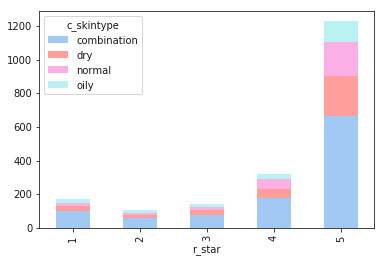

In [95]:
import seaborn as sns
from matplotlib.colors import ListedColormap
#sns.set_color_codes('pastel')
df.plot.bar(stacked=True, colormap=ListedColormap(sns.color_palette('pastel')))

In [98]:
topics['dominant_topic'].dtype

dtype('int64')

In [36]:
lda_vectors = df_document_topic.drop('dominant_topic', axis=1)
lda_vectors['r_star'] = review_long_df['r_star'].values

In [19]:
filename = './bella/bellaflask/tmp/lda_vectors.df.pk'
with open(filename, 'wb') as f:
     pickle.dump(lda_vectors, f)

In [31]:
#topic2doc sparsity
print("Sparsicity: ", ((lda_output > 0).sum() * 1.0/lda_output.size)*100, "%")

Sparsicity:  100.0 %


In [32]:
#cluster similiar topics
from sklearn.decomposition import TruncatedSVD
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=7, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.35  0.19  0.26  0.41  0.48  0.23  0.24  0.53]
 [ 0.02  0.02 -0.01 -0.3   0.78  0.09  0.01 -0.54]]
Perc of Variance Explained: 
 [0.01 0.23]


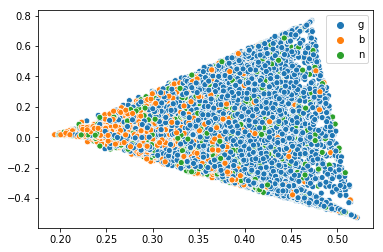

In [35]:
# Plot distribution of topic vectors colored by ratings
import seaborn as sns
rating = (review_long_df['r_star'] > 4).values
l = []
for v in review_long_df['r_star'].values:
    if v ==5:
        l.append('g')
    elif v<4:
        l.append('b')
    else:
        l.append('n')
        
sns.scatterplot(x=x, y=y, hue=l)

There is no enough separation using topic distribution as features to cluster customers.